## Importing the necessary libraries.

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Data Collection 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

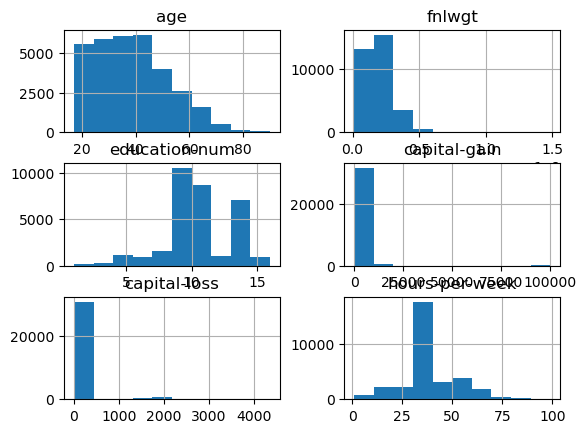

In [4]:
df.hist()

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: xlabel='workclass'>

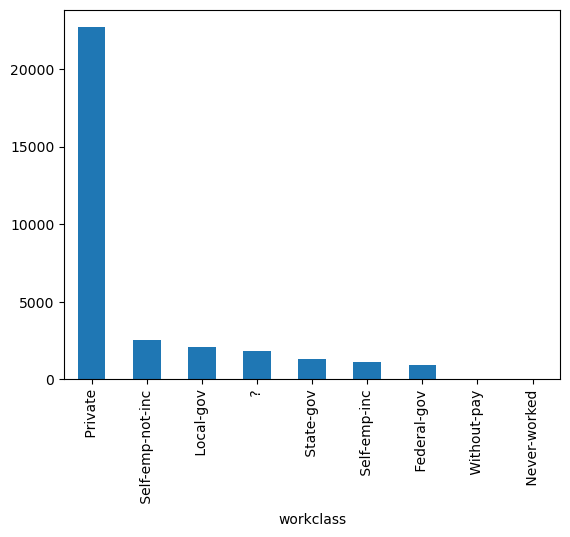

In [6]:
df['workclass'].value_counts().plot(kind='bar')

In [7]:
df['workclass'].unique() #to check spellings and symantic for futher processing

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### Data Preprocessing

In [8]:
df = df.replace(' ?', pd.NaT)
df = df.dropna()
print('df size', df.shape)

df size (30162, 15)


In [9]:
#Dropping out NA values. While dropping na from train data set, you must also drop na from test data set

In [10]:
X=df.drop('target', axis =1)
y = df['target']

#### Splitting the data set into training and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [33]:
print('df size', df.shape)
print('X_train size', X_train.shape)
print('y_train size', y_train.shape)
print('X_test size', X_test.shape)
print('y_test size', y_test.shape)

df size (30162, 15)
X_train size (24129, 14)
y_train size (24129,)
X_test size (6033, 14)
y_test size (6033,)


### Feature Engineering

In [13]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: target, dtype: object

#### Filtering out the categorical columns.
Either of the following 2 methods can be used.

In [15]:
# X.select_dtypes(exclude=["number"]).columns 

In [34]:
X.select_dtypes(include=['object']).columns.tolist()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [35]:
#Assigning categorical attributes/non numeric 
categorical_attributes = X.select_dtypes(include=['object']).columns.tolist()

#### Filtering out the numerical columns.

In [36]:
X.select_dtypes(include=['int64']).columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [37]:
#Assigning numerical attributes
numerical_attributes = X.select_dtypes(include=['int64']).columns.tolist()

In [38]:
print('Categorical attributes:', categorical_attributes)
print('Numerical attributes:', numerical_attributes)

Categorical attributes: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Numerical attributes: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [39]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

### Transforming the data 

##### since the data set consists of both categorical and numerical data, we have to transform the data using appropriate functions

In [40]:
ct = ColumnTransformer(
    [("scaling", StandardScaler(), numerical_attributes),
     ("onehotencoding", OneHotEncoder(handle_unknown ='ignore'), categorical_attributes)
    ]
)
ct.fit(X) # Fit the model make sure you input the main training data set.i.e which consists larger columns
X_train = ct.transform(X_train) #we are transforming X_train with variable X_train
X_test = ct.transform(X_test)  #we are transforming X_test with varibale X_test
print('X_train size', X_train.shape)
print('X_test size', X_test.shape)

X_train size (24129, 104)
X_test size (6033, 104)


### Model Training

In [48]:
model = SVC()
#since we have transformed the data above, we need to fit the data on X_train and y_train
model.fit(X_train, y_train) # make sure  the model is fitted on training data

SVC()

### Model Evaluation

#### Making Predictions

In [49]:
predictions = model.predict(X_test) #always pass X_test to the predict function
predictions

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

#### Checking Accuracy

In [50]:
accuracy = accuracy_score(y_test, predictions) #accuracy is always checked between y_test predictions
accuracy

0.85513011768606